<a href="https://colab.research.google.com/github/Jason-Durr/AIFinalProject/blob/master/Project/ProjectDataParsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle competitions download -c nfl-big-data-bowl-2022
! unzip nfl-big-data-bowl-2022.zip
# ! unzip ./PFFScoutingData.csv.zip
# ! unzip ./tracking2018.csv.zip
# ! unzip ./tracking2019.csv.zip
# ! unzip ./tracking2020.csv.zip
# ! unzip ./plays.csv.zip


Archive:  nfl-big-data-bowl-2022.zip
  inflating: PFFScoutingData.csv     
  inflating: games.csv               
  inflating: players.csv             
  inflating: plays.csv               
  inflating: tracking2018.csv        
  inflating: tracking2019.csv        
  inflating: tracking2020.csv        


In [ ]:
def getAbreviation(name, tacklers):
  lastname = name.split()[1]
  return int((name[0]+'.'+lastname) in tacklers or (name[:2]+'.'+lastname) in tacklers)

In [ ]:
import pandas as pd
import numpy as np
import re


In [ ]:
scouting = pd.read_csv("PFFScoutingData.csv")
games = pd.read_csv('games.csv')
players = pd.read_csv("players.csv")
plays = pd.read_csv("plays.csv")
tracking = pd.concat([pd.read_csv("tracking2018.csv"),pd.read_csv("tracking2019.csv"),pd.read_csv("tracking2020.csv")])


In [ ]:
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF


In [ ]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN


In [ ]:
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [ ]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [ ]:
tracking.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


In [ ]:
plays.playDescription[1]

'(9:20) C.Johnston punts 56 yards to ATL 36, Center-R.Lovato. J.Hardy to ATL 41 for 5 yards (K.Grugier-Hill). PENALTY on PHI-S.Gibson, Unsportsmanlike Conduct, 15 yards, enforced at ATL 41.'

In [ ]:
plays.specialTeamsResult.unique()

array(['Touchback', 'Return', 'Kick Attempt Good', 'Fair Catch', 'Downed',
       'Muffed', 'Kick Attempt No Good', 'Out of Bounds',
       'Non-Special Teams Result', 'Blocked Kick Attempt', 'Blocked Punt',
       'Kickoff Team Recovery'], dtype=object)

In [ ]:
plays = plays.query("specialTeamsResult == 'Return'")

In [ ]:
tracking.shape

(36769985, 18)

In [ ]:
tracking = pd.merge(tracking,plays[['playId','gameId']],on=['playId','gameId'])

In [ ]:
tracking

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13825962,2020-09-15T05:04:44.400,52.53,-3.12,6.30,1.94,0.64,NaN,NaN,None,NaN,football,NaN,NaN,football,108,2020091401,3741,right
13825963,2020-09-15T05:04:44.500,52.36,-3.74,6.19,1.85,0.63,NaN,NaN,None,NaN,football,NaN,NaN,football,109,2020091401,3741,right
13825964,2020-09-15T05:04:44.600,52.14,-4.31,6.00,2.12,0.61,NaN,NaN,None,NaN,football,NaN,NaN,football,110,2020091401,3741,right
13825965,2020-09-15T05:04:44.700,51.96,-4.84,5.66,2.49,0.56,NaN,NaN,None,NaN,football,NaN,NaN,football,111,2020091401,3741,right


In [ ]:
plays.head(1)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18


In [ ]:
def processPlay(index,play,count):
  global finalData
  game = games.query("gameId == @play.gameId")

  play_tracking = tracking.query("gameId == @play.gameId & playId == @play.playId")
  try:
    receive = play_tracking.query("event == 'punt_received' | event == 'kick_received'").time.iloc[0]
    tackle = play_tracking.query("event == 'tackle'").time.iloc[0]
  except IndexError:
    count +=1
    print(play.specialTeamsPlayType,play_tracking.event.unique())
    raise IndexError
  try:
    tacklers = set(re.split(";|,",re.search("\([A-z]+\.[^\)]*\)",play.playDescription).group(0)[1:-1]))
  except AttributeError:
    count +=1
    print(play.playDescription)
    # raise AttributeError
  if play.possessionTeam == game.homeTeamAbbr.iloc[0]:
    kicking = "home"
    recieving = "away"
  elif play.possessionTeam == game.visitorTeamAbbr.iloc[0]:
    kicking = "away"
    recieving = "home"
  play_tracking = play_tracking.query('time >= @receive & time <= @tackle')
  prev_runner_direction = None
  prev_tacklers_direction = None
  playData = pd.DataFrame(columns=finalData.columns)
  for step,time in enumerate(play_tracking.time.unique()):
    momentData = pd.DataFrame(columns=finalData.columns)

    moment = play_tracking.query("time == @time")
    kicking_players = moment.query("team == @kicking")
    recieving_players = moment.query("team == @recieving")
    momentData['PlayerId'] = kicking_players.nflId
    momentData['Tackler'] = kicking_players["displayName"].map(lambda x: getAbreviation(x, tacklers))
    momentData["GameId"] = play.gameId
    momentData["PlayId"] = play.playId
    momentData['TimeStep'] = step



    if sum(tackleColumn) == 0:
      count +=1
      raise Exception('No Tackler Found')
    returner = recieving_players.query('nflId == @play.returnerId').iloc[0]
    recieving_players = recieving_players.drop(returner.name)
    momentData["Returner Speed"] = returner.s
    momentData['Distance'] = kicking_players.apply(lambda x: distance(x, returner),axis=1)
    momentData['BlockersBetween'] = kicking_players.apply(lambda x: sum(recieving_players.apply(lambda y: calcAngle(x,y,returner),axis=1)),axis=1)
    momentData['DefendersBetween'] = kicking_players.apply(lambda x: sum(kicking_players.apply(lambda y: calcAngle(x,y,returner),axis=1)),axis=1)
    if prev_runner_direction is None:
      prev_runner_direction = returner['dir']
    momentData['RDirectionChange'] = np.abs(returner['dir']-prev_runner_direction)
    prev_runner_direction = returner['dir']
    momentData['TimeToIntersect'] = kicking_players.apply(lambda x: calcIntersectPoint(x,returner),axis=1)
    playData = playData.append(momentData)
  return playData

In [ ]:
import time as t
count = 0
# finalData = pd.DataFrame(columns=['GameId',"PlayId","TimeStep","Tackler","PlayerId", 'TimeToIntersect','BlockersBetween','DefendersBetween','Distance','Returner Speed','RDirectionChange'])
for index, play in plays.iterrows():
  start = t.time()
  game = games.query("gameId == @play.gameId")

  if finalData.query("GameId == @play.gameId & PlayId == @play.playId").shape[0] > 0:
    continue

  play_tracking = tracking.query("gameId == @play.gameId & playId == @play.playId")
  try:
    receive = play_tracking.query("event == 'punt_received' | event == 'kick_received'").time.iloc[0]
    tackle = play_tracking.query("event == 'tackle'").time.iloc[0]
  except IndexError:
    # count +=1
    # print(play.specialTeamsPlayType,play_tracking.event.unique())
    continue
  try:
    tacklers = set(re.split(";|,",re.search("\([A-z]+\.[^\)]*\)",play.playDescription).group(0)[1:-1]))
  except AttributeError:
    # count +=1
    # print(play.playDescription)
    continue
  if play.possessionTeam == game.homeTeamAbbr.iloc[0]:
    kicking = "home"
    recieving = "away"
  elif play.possessionTeam == game.visitorTeamAbbr.iloc[0]:
    kicking = "away"
    recieving = "home"
  play_tracking = play_tracking.query('time >= @receive & time <= @tackle')
  prev_runner_direction = None
  prev_tacklers_direction = None
  playData = pd.DataFrame(columns=finalData.columns)
  for step,time in enumerate(play_tracking.time.unique()):
    momentData = pd.DataFrame(columns=finalData.columns)

    moment = play_tracking.query("time == @time")
    kicking_players = moment.query("team == @kicking")
    recieving_players = moment.query("team == @recieving")
    momentData['PlayerId'] = kicking_players.nflId
    momentData['Tackler'] = kicking_players["displayName"].map(lambda x: getAbreviation(x, tacklers))
    momentData["GameId"] = play.gameId
    momentData["PlayId"] = play.playId
    momentData['TimeStep'] = step



    if sum(tackleColumn) == 0:
      count +=1
      raise Exception('No Tackler Found')
    try:
      returner = recieving_players.query('nflId == @play.returnerId').iloc[0]
    except IndexError:
      continue
    recieving_players = recieving_players.drop(returner.name)
    momentData["Returner Speed"] = returner.s
    momentData['Distance'] = kicking_players.apply(lambda x: distance(x, returner),axis=1)
    momentData['BlockersBetween'] = kicking_players.apply(lambda x: sum(recieving_players.apply(lambda y: calcAngle(x,y,returner),axis=1)),axis=1)
    momentData['DefendersBetween'] = kicking_players.apply(lambda x: sum(kicking_players.apply(lambda y: calcAngle(x,y,returner),axis=1)),axis=1)
    if prev_runner_direction is None:
      prev_runner_direction = returner['dir']
    momentData['RDirectionChange'] = np.abs(returner['dir']-prev_runner_direction)
    prev_runner_direction = returner['dir']
    momentData['TimeToIntersect'] = kicking_players.apply(lambda x: calcIntersectPoint(x,returner),axis=1)
    playData = playData.append(momentData)
  finalData = finalData.append(playData)
  if t.time() - start > 22000:
    break
  # if index > 5000:
  #   break
  # break
count

In [539]:
finalData.to_csv("FinalData.csv")
# finalData


In [ ]:
def calcAngle(defender, blocker,returner):
  
  vec1 = blocker[["x","y"]].to_numpy()-returner[["x","y"]].to_numpy()
  # print(vec1)
  # print(np.linalg.norm(vec1))
  vec1 = vec1/np.linalg.norm(vec1)
  # print(vec1)
  vec2 = blocker[["x","y"]].to_numpy()-defender[["x","y"]].to_numpy()
  # print(vec2)
  # print(np.linalg.norm(vec2))
  if np.linalg.norm(vec2) == 0:
    return 0
  vec2 = vec2/np.linalg.norm(vec2)
  return np.arccos(np.dot(vec1,vec2))/np.pi


In [ ]:
def distance(player, returner):
  # print(player)
  # print(player[["x","y"]].to_numpy())
  return np.linalg.norm(player[["x","y"]].to_numpy()-returner[["x","y"]].to_numpy())

In [ ]:
def calcIntersectPoint(player, returner):
  m1 = np.math.tan(player.dir)
  m2 = np.math.tan(returner.dir)
  diff = m1-m2
  if diff == 0:
    diff = .0001
  x_int = (m1*player.x-player.y-m2*returner.x + returner.y)/(diff)
  y_int = m1*(x_int-player.x)+player.y

  intersect = np.asarray([x_int,y_int])
  t1 = np.linalg.norm(intersect-player[['x','y']].to_numpy())/player.s
  t2 = np.linalg.norm(intersect-returner[['x','y']].to_numpy())/returner.s
  return t1-t2



In [ ]:
finalData

,GameId,PlayId,TimeStep,Tackler,PlayerId,TimeToIntersect,BlockersBetween,DefendersBetween,Distance,Returner Speed,RDirectionChange,KDirectionChange
4513888,2018090600,366,38,0,32361.0,-0.023628,0.284169,0.712376,1.391761,5.68,0.0,0.0
4514400,2018090600,366,38,0,40408.0,1.191762,2.468466,4.537028,9.237040,5.68,0.0,0.0
4514656,2018090600,366,38,0,42515.0,1.105201,0.635630,2.188617,2.884614,5.68,0.0,0.0
4514784,2018090600,366,38,0,42942.0,0.735890,2.014835,2.891681,6.131052,5.68,0.0,0.0
4514912,2018090600,366,38,0,43442.0,-1.323018,4.432651,5.033010,15.056228,5.68,0.0,0.0
4515040,2018090600,366,38,1,43497.0,-0.104684,0.284050,0.709896,1.217087,5.68,0.0,0.0
4515424,2018090600,366,38,0,44979.0,0.954950,2.606768,2.348597,7.577704,5.68,0.0,0.0
4515680,2018090600,366,38,0,44997.0,0.544874,1.184140,3.013980,5.012235,5.68,0.0,0.0
4515936,2018090600,366,38,0,45599.0,5.636400,6.748773,7.351620,27.116351,5.68,0.0,0.0
4516064,2018090600,366,38,0,45603.0,0.730993,4.516916,5.618334,14.404183,5.68,0.0,0.0


[]

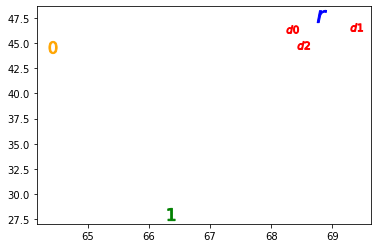

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(returner['x'], returner['y'], c='blue', s=150, label='1',marker='$r$')
plt.scatter(kicking_players.iloc[0]['x'], kicking_players.iloc[0]['y'], c='red', s=150, label='1',marker='$d0$')
plt.scatter(kicking_players.iloc[5]['x'], kicking_players.iloc[5]['y'], c='red', s=150, label='1',marker='$d1$')
plt.scatter(kicking_players.iloc[2]['x'], kicking_players.iloc[2]['y'], c='red', s=150, label='1',marker='$d2$')
plt.scatter(recieving_players.iloc[0]['x'], recieving_players.iloc[0]['y'], c='orange', s=150, label='1',marker='$0$')
plt.scatter(recieving_players.iloc[1]['x'], recieving_players.iloc[1]['y'], c='green', s=150, label='1',marker='$1$')
# plt.scatter(spaces_ones, symmetry_ones, c='blue', s=15, label='1')
# plt.xlim((0,120))
# plt.ylim((0,53))
plt.plot()

In [538]:
np.exp(.99)

2.691234472349262

In [537]:
np.exp(.01)

1.010050167084168

In [535]:
.99-.01

0.98

In [536]:
.9801-.0001

0.98